/home/mark/anaconda3/envs/whk-snn/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


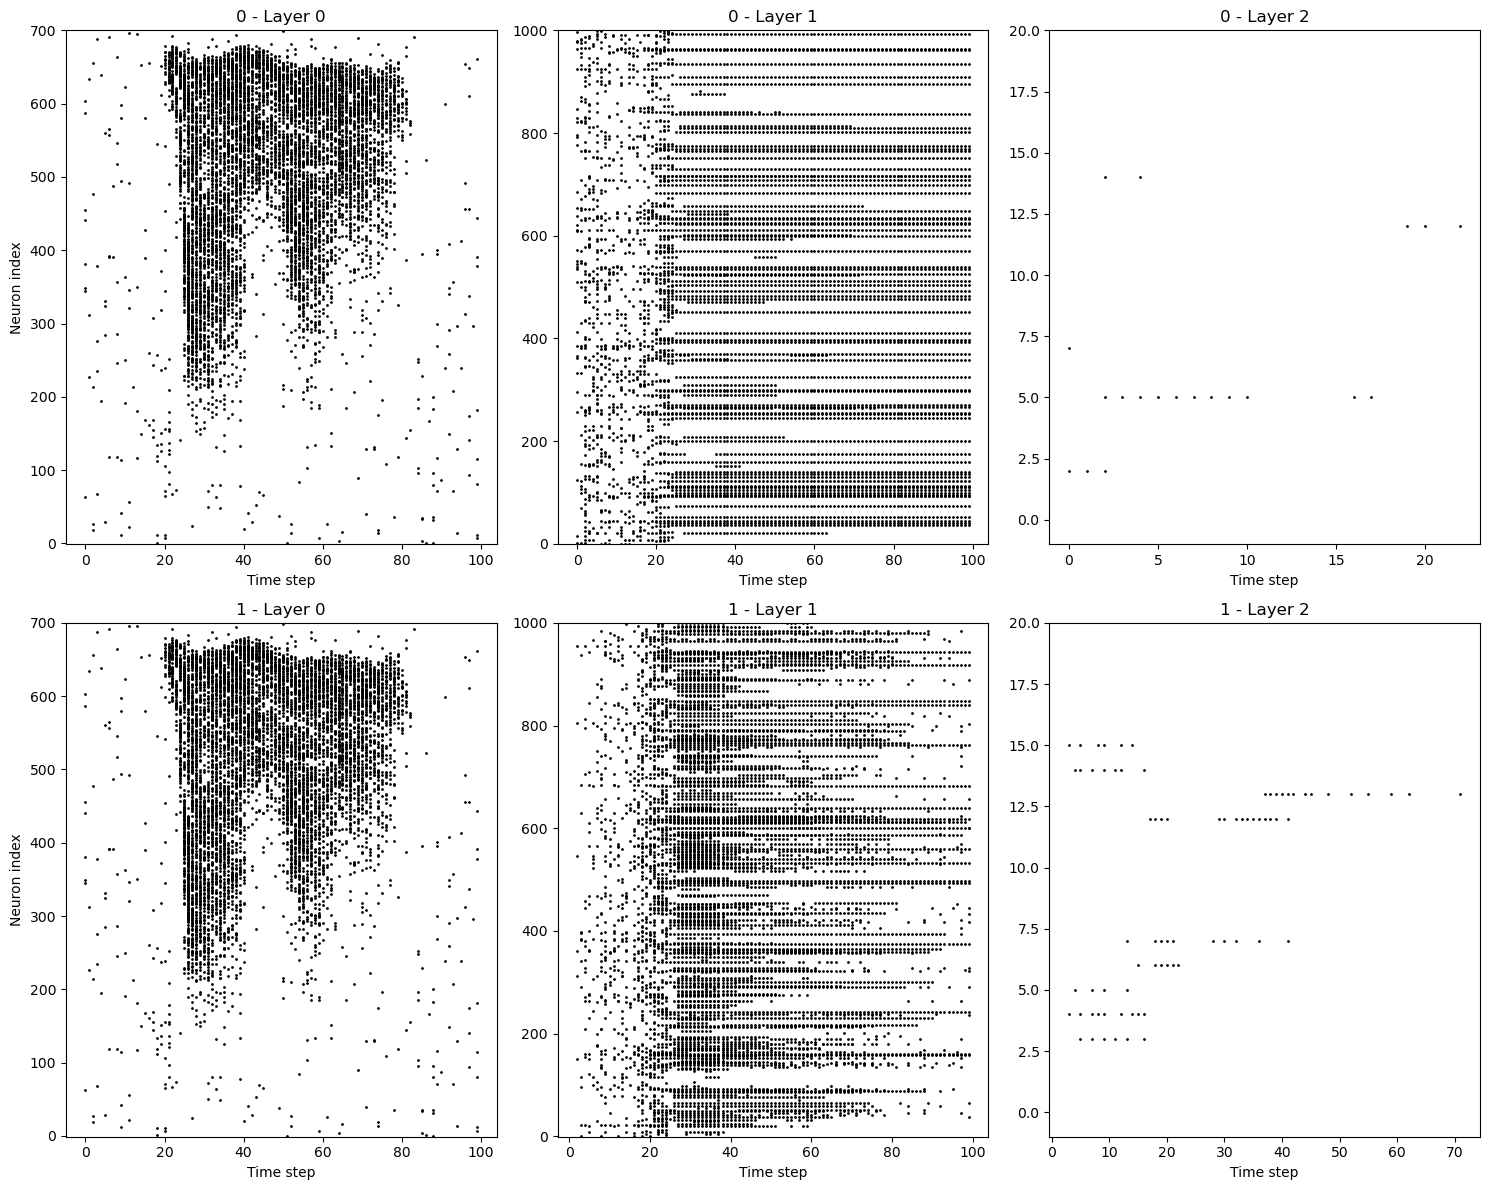

In [ ]:
import copy
import torch
from util.plot_layer_development import plot_layer_development
from neural_nets.configurable_spiking_neural_net import ConfigurableSpikingNeuralNet
from neural_nets.configurable_spiking_neural_net import ConfigurableSpikingNeuralNet

from constants import NUMBER_INPUT_NEURONS, NUMBER_OUTPUT_NEURONS, BETA, THRESHOLD, TIME_STEPS

num_epochs = 500
sparsity = 0
number_hidden_neurons = 1000
number_hidden_layer = 1

base_net = ConfigurableSpikingNeuralNet(
    number_input_neurons=NUMBER_INPUT_NEURONS,
    number_hidden_neurons=number_hidden_neurons,
    number_output_neurons=NUMBER_OUTPUT_NEURONS,
    beta=BETA,
    threshold=THRESHOLD,
    time_steps=TIME_STEPS,
    number_hidden_layers=number_hidden_layer,
)

models = []

paths = [
    './models/experiment_point_of_chaos/500_epochs_epoch_499.pth',
    './models/experiment_point_of_chaos/500_epochs_epoch_3.pth'
]


for path in paths:
    model = copy.deepcopy(base_net)

    model_path = path

    model.load_state_dict(torch.load(model_path))
    models.append(model)

plot_layer_development(models, sub_titles=[i for i in range(5)])